<a href="https://colab.research.google.com/github/uditamujumdar/flightPricePredictionModel/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df=pd.read_csv('Clean_Dataset.csv.zip')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [4]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [5]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [6]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [7]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [8]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [9]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [10]:
df['duration'].min()

0.83

In [11]:
df['duration'].max()

49.83

In [12]:
df['duration'].median()

11.25

#Preprocessing

In [13]:
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('flight', axis=1)

df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [14]:
df.stops=pd.factorize(df.stops)[0]

In [15]:
#one-hot encoding
#pd.get_dummies function creates one-hot encoded columns
df= df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)

In [16]:
df= df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df= df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df= df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df= df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [17]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


#Training Regression Model


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y= df.drop('price', axis=1), df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [21]:
reg.score(X_test, y_test)

0.9860186447036274

In [22]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred= reg.predict(X_test)

print('R2: ', r2_score(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('MSE: ', mean_squared_error(y_test,y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9860186447036274
MAE:  1057.6254559459755
MSE:  7210304.670383507
RMSE:  2685.20104841025


Text(0.5, 1.0, 'Predicted v/s Actual Price')

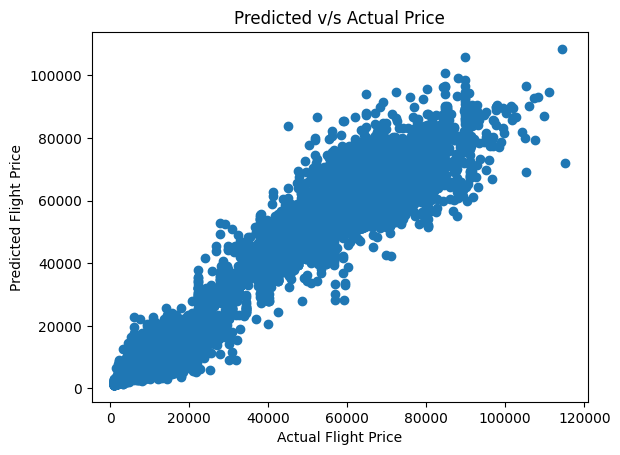

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted v/s Actual Price')

In [25]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_imp = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_imp

[('class', 0.8798999892575268),
 ('duration', 0.05763778185526683),
 ('days_left', 0.018739851854401825),
 ('airline_Vistara', 0.005175148636058319),
 ('airline_Air_India', 0.004640534449825297),
 ('source_Delhi', 0.0036108783000387236),
 ('dest_Delhi', 0.0031766263530105415),
 ('source_Mumbai', 0.002259320004073406),
 ('dest_Mumbai', 0.0019289028537003755),
 ('stops', 0.0018686504512534132),
 ('dest_Kolkata', 0.0018483689864505443),
 ('source_Kolkata', 0.0016483768862146076),
 ('dest_Hyderabad', 0.001571928445072466),
 ('arrival_Evening', 0.0015340939748751195),
 ('source_Hyderabad', 0.0013539646791309657),
 ('dest_Bangalore', 0.0013105056433659174),
 ('arrival_Night', 0.001129911730061683),
 ('departure_Evening', 0.0010524968211384782),
 ('source_Bangalore', 0.0010218613360472924),
 ('arrival_Afternoon', 0.0009817782615331205),
 ('source_Chennai', 0.0009008265711312162),
 ('departure_Morning', 0.0008864017258757898),
 ('dest_Chennai', 0.0008805164244597841),
 ('departure_Night', 0.00

<BarContainer object of 5 artists>

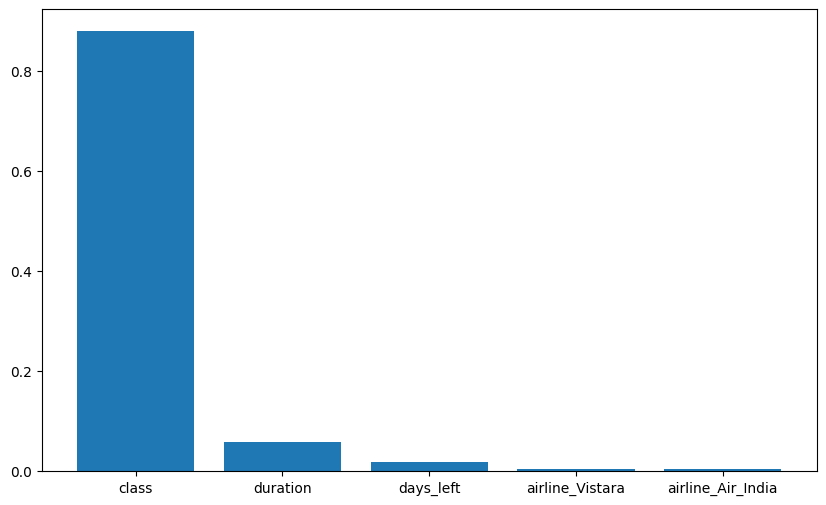

In [26]:
plt.figure(figsize=(10, 6))

plt.bar([x[0] for x in sorted_imp[:5]], [x[1] for x in sorted_imp[:5]])

Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

reg=RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features':['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# The parameter grid is passed into GridSearchCV, which will train multiple models, each with a different combination of hyperparameters
# and find the best one
# Hyperparameter tuning improves model performance.
# Grid Search-> tries all options (slow but best).
# Random Search-> tries a subset (faster but may miss best).

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features':[1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error',
                                   verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 

In [30]:
best_regressor.score(X_test, y_test)

0.9868497452373599

In [31]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred= best_regressor.predict(X_test)

print('R2: ', r2_score(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('MSE: ', mean_squared_error(y_test,y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9868497452373599
MAE:  1075.3249723980969
MSE:  6781699.007133918
RMSE:  2604.1695427014574


Text(0.5, 1.0, 'Predicted v/s Actual Price')

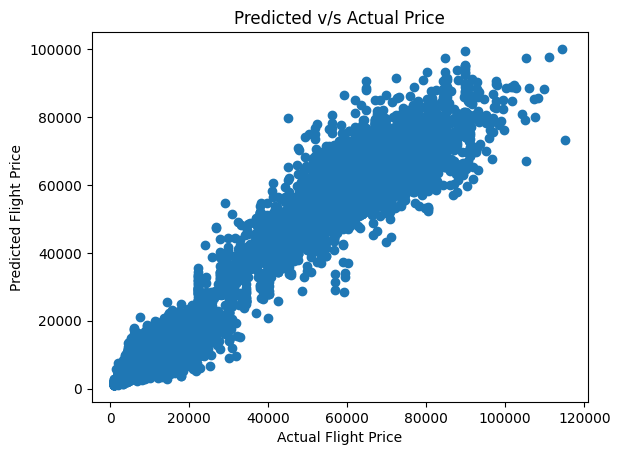

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted v/s Actual Price')